In [26]:
import carla
import random
import csv
import time
import os
import matplotlib.pyplot as plt

map_center_line = []

client = carla.Client('localhost', 2000)
client.set_timeout(5.0)

map_name = 'Town05'
world = client.load_world(map_name)
world_map = world.get_map()


In [3]:
len(world_map.generate_waypoints(1.0))

24212

In [4]:
def get_laneId_and_roadId(world_map):
    lane_ids = set()
    road_ids = set()
    for waypoint in world_map.generate_waypoints(1.0):
        lane_ids.add(waypoint.lane_id)
        road_ids.add(waypoint.road_id)
    return lane_ids, road_ids

lane_ids, road_ids = get_laneId_and_roadId(world_map)
print(len(lane_ids), len(road_ids))

7 259


In [39]:
import pandas as pd
data_list = []

for waypoint in world_map.generate_waypoints(1.0):
    x = waypoint.transform.location.x
    y = waypoint.transform.location.y
    road_id = waypoint.road_id
    lane_id = waypoint.lane_id
    s = waypoint.s
    data_list.append([x, y, road_id, lane_id, s])

map_df = pd.DataFrame(data_list, columns=['x', 'y', 'road_id', 'lane_id', 's'])


In [40]:
map_df

,x,y,road_id,lane_id,s
0,17.167255,-4.492480,0,-2,2.220446e-15
1,17.175774,-0.992490,0,-1,2.220446e-15
2,17.184292,2.507499,0,1,2.220446e-15
3,17.192810,6.007489,0,2,2.220446e-15
4,16.167259,-4.490046,0,-2,1.000000e+00
...,...,...,...,...,...
24207,40.294231,187.038818,2370,1,1.400000e+01
24208,41.096851,187.326508,2370,1,1.500000e+01
24209,41.920792,187.545792,2370,1,1.600000e+01
24210,42.760239,187.695099,2370,1,1.700000e+01


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

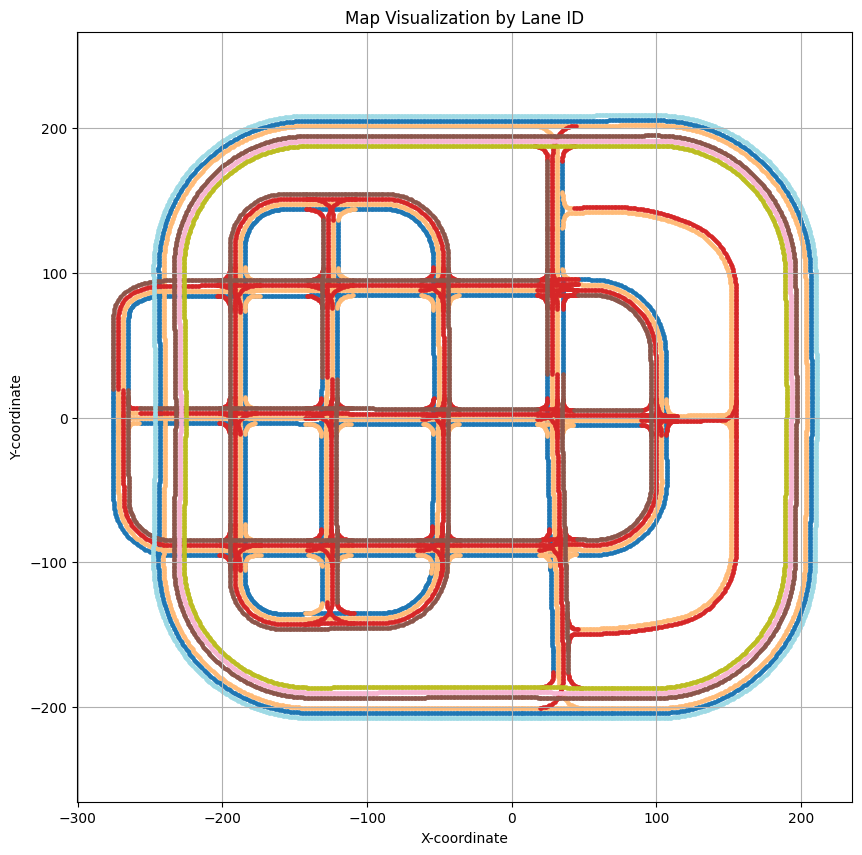

In [41]:
import numpy as np

plt.figure(figsize=(10, 10))
unique_lane_ids = map_df['lane_id'].unique()
cmap = plt.get_cmap('tab20') 
colors = [cmap(i) for i in np.linspace(0, 1, len(unique_lane_ids))]

for lane_id, color in zip(unique_lane_ids, colors):
    lane_data = map_df[map_df['lane_id'] == lane_id]
    plt.scatter(lane_data['x'], lane_data['y'], c=color, s=5)

# plt.legend()
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.title('Map Visualization by Lane ID')
plt.grid(True)
plt.axis('equal')
# plt.show()
plt.savefig(f'figure/map_{map_name}_LaneId.png')

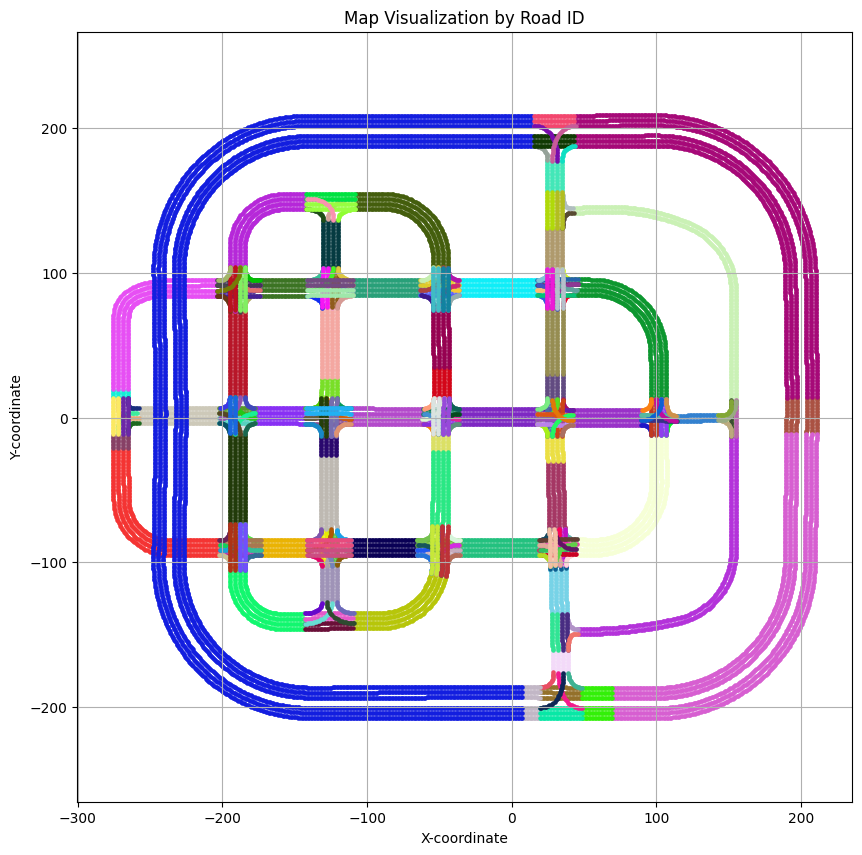

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import random

colors = [f'#{random.randint(0, 0xFFFFFF):06x}' for _ in range(len(map_df['road_id'].unique()))]
plt.figure(figsize=(10, 10))

unique_road_ids = map_df['road_id'].unique()

for road_id, color in zip(unique_road_ids, colors):
    road_data = map_df[map_df['road_id'] == road_id]
    plt.scatter(road_data['x'], road_data['y'], c=color, label=f'Road {road_id}', s=5)

# plt.legend()
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.title('Map Visualization by Road ID')
plt.grid(True)
plt.axis('equal')
# plt.show()
plt.savefig(f'figure/map_{map_name}_RoadId.png')

In [42]:
grouped_df = map_df.groupby(['road_id', 'lane_id'])[['x', 'y']].apply(lambda x: x.values.tolist()).reset_index()
grouped_df.columns = ['road_id', 'lane_id', 'coordinates']
grouped_df

,road_id,lane_id,coordinates
0,0,-2,"[[17.167255401611328, -4.4924798011779785], [1..."
1,0,-1,"[[17.17577362060547, -0.9924901127815247], [16..."
2,0,1,"[[17.18429183959961, 2.5074994564056396], [16...."
3,0,2,"[[17.19281005859375, 6.00748872756958], [16.19..."
4,1,-2,"[[-61.76251220703125, -4.300360679626465], [-6..."
...,...,...,...
481,2344,-1,"[[15.170449256896973, 201.64096069335938], [16..."
482,2353,1,"[[15.241942405700684, 187.64112854003906], [16..."
483,2358,-1,"[[15.171202659606934, 201.64096069335938], [16..."
484,2363,1,"[[44.1705436706543, 201.78663635253906], [43.0..."


In [34]:
topology = world_map.get_topology()

In [36]:
topology[0]

(<carla.libcarla.Waypoint at 0x2ace7cbc0f0>,
 <carla.libcarla.Waypoint at 0x2ace2114150>)

In [44]:
road_id, lane_id, s = map_df.iloc[0][['road_id', 'lane_id', 's']]

In [62]:
map_name = 'Town05'
record_duration = 60
trajectories_dir = f'trajectories/{map_name}_duration_{record_duration}'  # 更新轨迹文件夹名
if not os.path.exists(trajectories_dir):
    print("Trajectories directory not found.")
    exit()

trajectory_files = [file for file in os.listdir(trajectories_dir) if file.endswith('.csv')]
traj_all = []
for i, trajectory_file in enumerate(trajectory_files):
    x = []
    y = []
    traj = []
    with open(os.path.join(trajectories_dir, trajectory_file), 'r') as csvfile:
        csv_reader = csv.reader(csvfile)
        for row in csv_reader:
            traj.append(row)
    traj_all.append(traj)